## 라이브러리 impport

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로딩

In [2]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

## 결측치 확인

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


- id: 고유 id
- hour: 시간
- temperature: 기온
- precipitation: 비가 오지 않았으면 0, 비가 오면 1
- windspeed: 풍속(평균)
- humidity: 습도
- visibility: 특정 기상 상태에 따른 가시성
- ozone: 오존
- pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count: 시간에 따른 따릉이 대여 수

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [7]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

## 결측치 처리

In [8]:
train.fillna(0, inplace = True)

In [9]:
test.fillna(0, inplace = True)

##  통계치 확인

In [10]:
# 범주형 데이터 없음
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.694517,0.031528,2.463742,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.271990,0.174801,1.387657,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## 데이터 시각화

<AxesSubplot:>

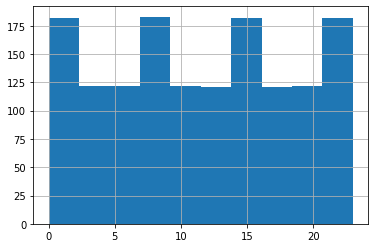

In [18]:
train['hour'].hist()

<AxesSubplot:>

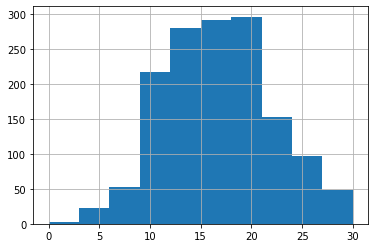

In [16]:
train['hour_bef_temperature'].hist()

<AxesSubplot:>

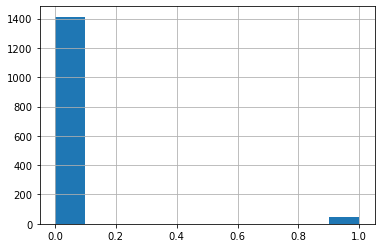

In [19]:
train['hour_bef_precipitation'].hist()

<AxesSubplot:>

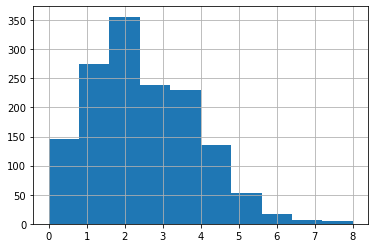

In [20]:
train['hour_bef_windspeed'].hist()

<AxesSubplot:>

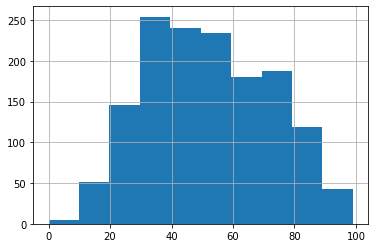

In [21]:
train['hour_bef_humidity'].hist()

<AxesSubplot:>

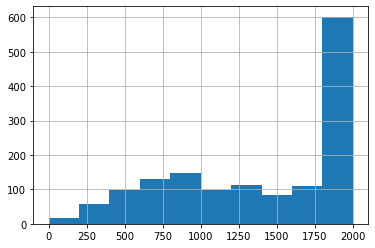

In [22]:
train['hour_bef_visibility'].hist()

<AxesSubplot:>

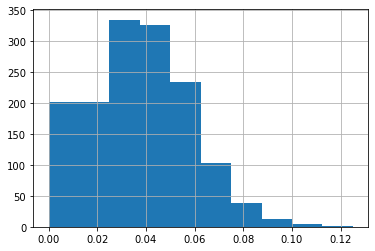

In [23]:
train['hour_bef_ozone'].hist()

<AxesSubplot:>

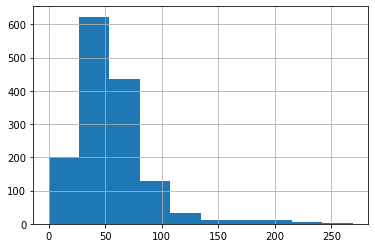

In [24]:
train['hour_bef_pm10'].hist()

<AxesSubplot:>

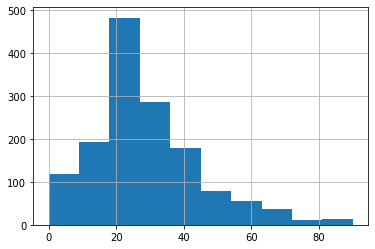

In [25]:
train['hour_bef_pm2.5'].hist()

<AxesSubplot:>

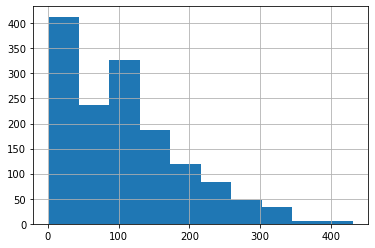

In [26]:
train['count'].hist()

## 상관관계 분석

In [28]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.002651,-0.056401,-0.001710,-0.019976,0.006926,0.058597,-0.022063,-0.012050,-0.002131
hour,-0.010901,1.000000,0.405553,0.021708,0.462188,-0.326464,0.176760,0.450612,0.062749,0.055543,0.626047
hour_bef_temperature,-0.002651,0.405553,1.000000,-0.095598,0.376715,-0.479358,0.205710,0.510923,0.019943,0.000521,0.619277
hour_bef_precipitation,-0.056401,0.021708,-0.095598,1.000000,0.024509,0.275869,-0.215696,-0.059354,-0.058610,-0.013009,-0.163580
hour_bef_windspeed,-0.001710,0.462188,0.376715,0.024509,1.000000,-0.417761,0.248713,0.491084,0.021566,-0.135292,0.458547
hour_bef_humidity,-0.019976,-0.326464,-0.479358,0.275869,-0.417761,1.000000,-0.578853,-0.392145,-0.101618,0.092388,-0.464890
hour_bef_visibility,0.006926,0.176760,0.205710,-0.215696,0.248713,-0.578853,1.000000,0.097932,-0.339860,-0.485773,0.301195
hour_bef_ozone,0.058597,0.450612,0.510923,-0.059354,0.491084,-0.392145,0.097932,1.000000,0.217722,0.168936,0.479579
hour_bef_pm10,-0.022063,0.062749,0.019943,-0.058610,0.021566,-0.101618,-0.339860,0.217722,1.000000,0.558211,-0.066773
hour_bef_pm2.5,-0.012050,0.055543,0.000521,-0.013009,-0.135292,0.092388,-0.485773,0.168936,0.558211,1.000000,-0.057918


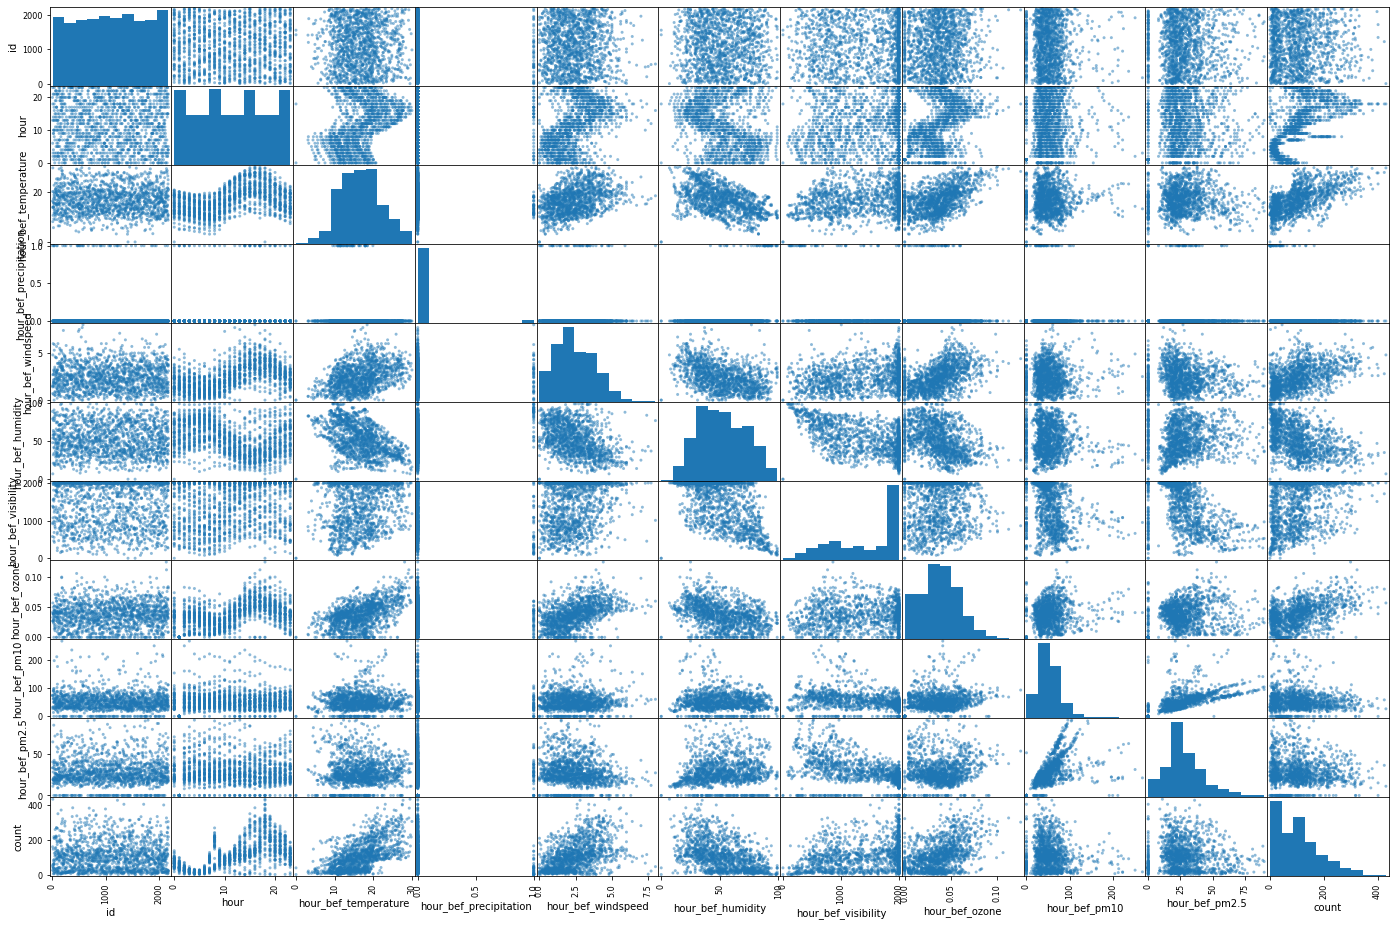

In [30]:
c = pd.plotting.scatter_matrix(train, figsize = (24, 16))

<AxesSubplot:>

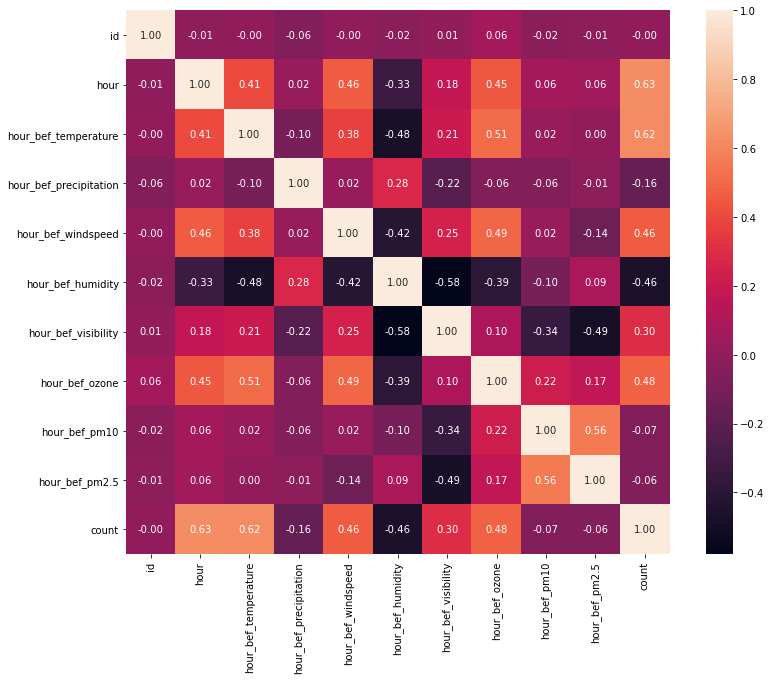

In [36]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

### 'hour'과 상관관계가 높은 컬럼

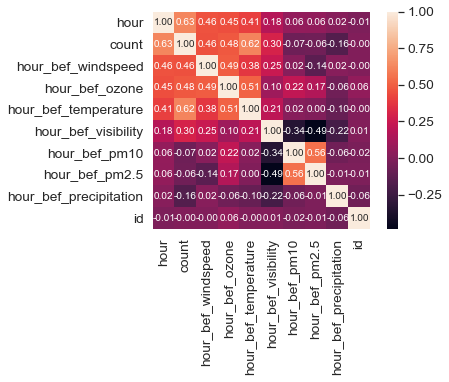

In [43]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train_corr.nlargest(k, 'hour')['hour'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 'humidity'와 상관관계가 높은 컬럼

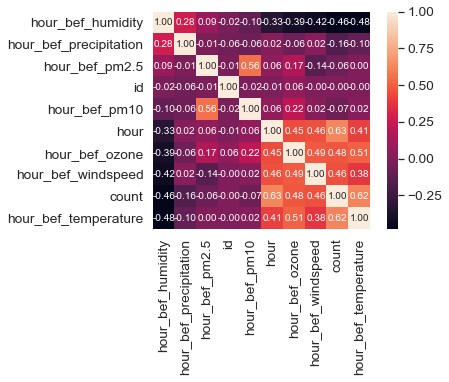

In [52]:
k = 10
cols = train_corr.nlargest(k, 'hour_bef_humidity')['hour_bef_humidity'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**양의 상관관계 (0.38 이상)**
- hour - temperature / windspeed / ozone / count
- temperature - windspeed / ozone / count
- windspeed - ozone / count
- ozone - count
- pm10 - pm2.5

**음의 상관관계 (- 0.33 이하)**
- humidity - hour / temperature / windspeed / visibility / ozone / count
- visibility - pm10 / pm2.5

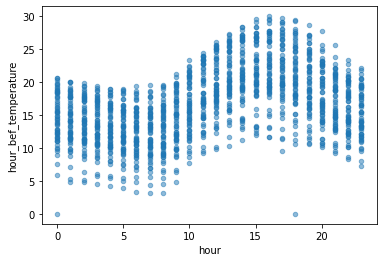

In [39]:
d = train.plot(kind = 'scatter', x = 'hour', y = 'hour_bef_temperature', alpha = 0.5)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

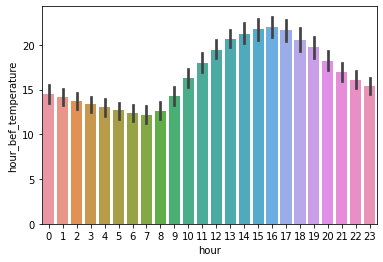

In [40]:
sns.barplot(data = train, x = 'hour', y = 'hour_bef_temperature')

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

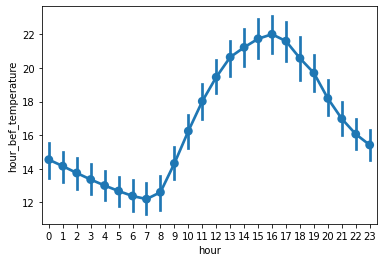

In [42]:
sns.pointplot(data = train, x = 'hour', y = 'hour_bef_temperature')

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

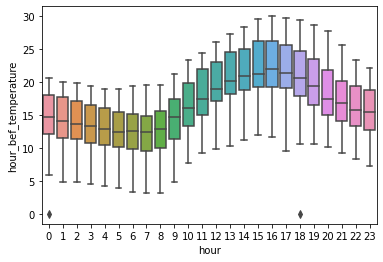

In [41]:
sns.boxplot(data = train, x = 'hour', y = 'hour_bef_temperature')

C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

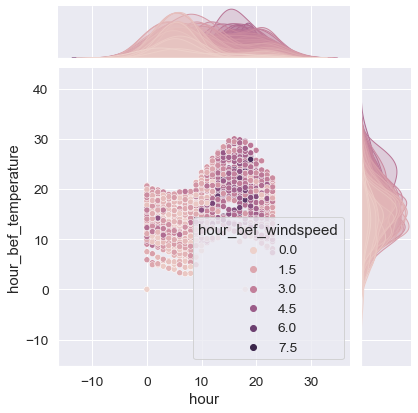

In [61]:
sns.jointplot(data = train, x="hour", y="hour_bef_temperature", hue="hour_bef_windspeed")

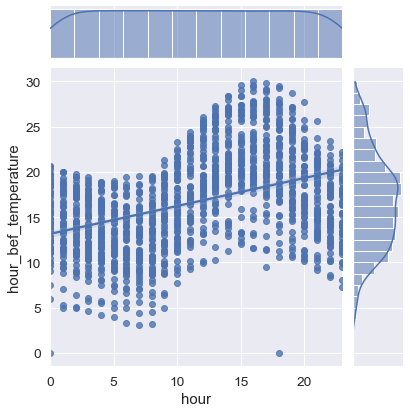

In [62]:
sns.jointplot(data = train, x="hour", y="hour_bef_temperature", kind="reg")